In [1]:
# Cell 1: Imports and Initial Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

# Display options
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Cell 2: Fetch data from yfinance
import yfinance as yf

tickers = ['^GSPC', '^NDX', 'GC=F', 'HG=F', 'CL=F', 'NG=F', 'LE=F', 'JPY=X', 'EURUSD=X', 'DX-Y.NYB']
data = yf.download(tickers, start="2002-01-01", end="2025-04-01")['Close']

data = data.rename(columns={
    '^GSPC': 'SP500',
    '^NDX': 'NASDAQ100',
    'GC=F': 'Gold',
    'HG=F': 'Copper',
    'CL=F': 'CrudeOil',
    'NG=F': 'NaturalGas',
    'LE=F': 'LiveCattle',
    'JPY=X': 'USDJPY',
    'EURUSD=X': 'EURUSD',
    'DX-Y.NYB': 'USDIndex'
})

# Drop NaNs
data = data.dropna()

data.head()
data = data.dropna()

data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed


Ticker,CrudeOil,USDIndex,EURUSD,Gold,Copper,USDJPY,LiveCattle,NaturalGas,SP500,NASDAQ100
Date,,,,,,,,,,
2003-12-01,29.950001,90.349998,1.196501,402.700012,0.9555,109.169998,99.025002,5.283,1070.119995,1447.079956
2003-12-02,30.780001,89.639999,1.208897,403.700012,0.9695,108.730003,99.574997,5.579,1066.619995,1431.890015
2003-12-03,31.100000,89.500000,1.212298,403.899994,0.9760,108.300003,98.150002,5.756,1064.729980,1419.770020
2003-12-04,31.260000,89.599998,1.208094,403.299988,0.9630,108.269997,97.050003,6.337,1069.719971,1432.380005
2003-12-05,30.730000,89.139999,1.218695,406.399994,0.9690,107.620003,96.574997,6.135,1061.500000,1406.910034


In [3]:
# Cell 3: Data Exploration & Cleaning
data = data.ffill().dropna()

data.head()
data.describe()


Ticker,CrudeOil,USDIndex,EURUSD,Gold,Copper,USDJPY,LiveCattle,NaturalGas,SP500,NASDAQ100
count,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000,5288.000000
mean,70.142621,89.876328,1.227476,1311.632620,3.084337,109.998262,118.944346,4.382177,2336.934786,6067.018795
std,21.826123,9.436752,0.129025,528.085976,0.866908,18.138886,29.517541,2.291224,1317.940696,5367.321712
min,-37.630001,71.330002,0.959619,374.799988,0.955500,75.739998,73.599998,1.482000,676.530029,1036.510010
25%,52.637500,81.414999,1.115536,946.474976,2.589500,101.396502,93.268751,2.741000,1279.510040,1863.774994
50%,69.384998,89.830002,1.213321,1285.699951,3.142750,109.321499,116.400002,3.689000,1938.875000,3973.729980
75%,86.434999,97.182501,1.324166,1708.425049,3.712875,117.440002,133.275002,5.629500,2992.320068,8231.787598
max,145.289993,114.110001,1.598798,3010.199951,5.119000,161.606995,208.550003,15.378000,6144.149902,22175.599609


In [4]:
# Cell 3: Integrating FRED Economic Data
from fredapi import Fred
import pandas as pd

# Insert your own API Key from FRED clearly here
fred = Fred(api_key='04e837bfc107e4622a89bb7acf50bca5')

fred_series = {
    '10Y_Treasury_Yield': 'DGS10',
    '2Y10Y_Spread': 'T10Y2Y',
    'CPI': 'CPIAUCSL',
    'PPI': 'PPIACO',
    'Unemployment_Rate': 'UNRATE',
    'US_Federal_Funds_Rate': 'FEDFUNDS',
    'Consumer_Price_Index': 'CPIAUCSL',
    'Consumer_Sentiment': 'UMCSENT'
}

# Fetch data from FRED API
macro_data = pd.DataFrame({name: fred.get_series(series) for name, series in fred_series.items()})

# Set DateTime index clearly
macro_data.index = pd.to_datetime(macro_data.index)

# Align macroeconomic data dates with market data clearly
macro_data = macro_data.loc['2002-01-01':'2025-04-01'].ffill().dropna()

macro_data.head()


,10Y_Treasury_Yield,2Y10Y_Spread,CPI,PPI,Unemployment_Rate,US_Federal_Funds_Rate,Consumer_Price_Index,Consumer_Sentiment
2002-01-02,5.20,1.98,177.7,128.5,5.7,1.73,177.7,93.0
2002-01-03,5.16,1.97,177.7,128.5,5.7,1.73,177.7,93.0
2002-01-04,5.18,1.99,177.7,128.5,5.7,1.73,177.7,93.0
2002-01-07,5.09,2.01,177.7,128.5,5.7,1.73,177.7,93.0
2002-01-08,5.10,2.03,177.7,128.5,5.7,1.73,177.7,93.0


In [5]:
# Cell 3: Merge returns data and macroeconomic data clearly
data = pd.merge(data, macro_data, left_index=True, right_index=True, how='inner')

data.head()


,CrudeOil,USDIndex,EURUSD,Gold,Copper,USDJPY,LiveCattle,NaturalGas,SP500,NASDAQ100,10Y_Treasury_Yield,2Y10Y_Spread,CPI,PPI,Unemployment_Rate,US_Federal_Funds_Rate,Consumer_Price_Index,Consumer_Sentiment
2003-12-01,29.950001,90.349998,1.196501,402.700012,0.9555,109.169998,99.025002,5.283,1070.119995,1447.079956,4.40,2.28,185.5,139.5,5.7,0.98,185.5,92.6
2003-12-02,30.780001,89.639999,1.208897,403.700012,0.9695,108.730003,99.574997,5.579,1066.619995,1431.890015,4.38,2.31,185.5,139.5,5.7,0.98,185.5,92.6
2003-12-03,31.100000,89.500000,1.212298,403.899994,0.9760,108.300003,98.150002,5.756,1064.729980,1419.770020,4.41,2.32,185.5,139.5,5.7,0.98,185.5,92.6
2003-12-04,31.260000,89.599998,1.208094,403.299988,0.9630,108.269997,97.050003,6.337,1069.719971,1432.380005,4.38,2.32,185.5,139.5,5.7,0.98,185.5,92.6
2003-12-05,30.730000,89.139999,1.218695,406.399994,0.9690,107.620003,96.574997,6.135,1061.500000,1406.910034,4.23,2.35,185.5,139.5,5.7,0.98,185.5,92.6


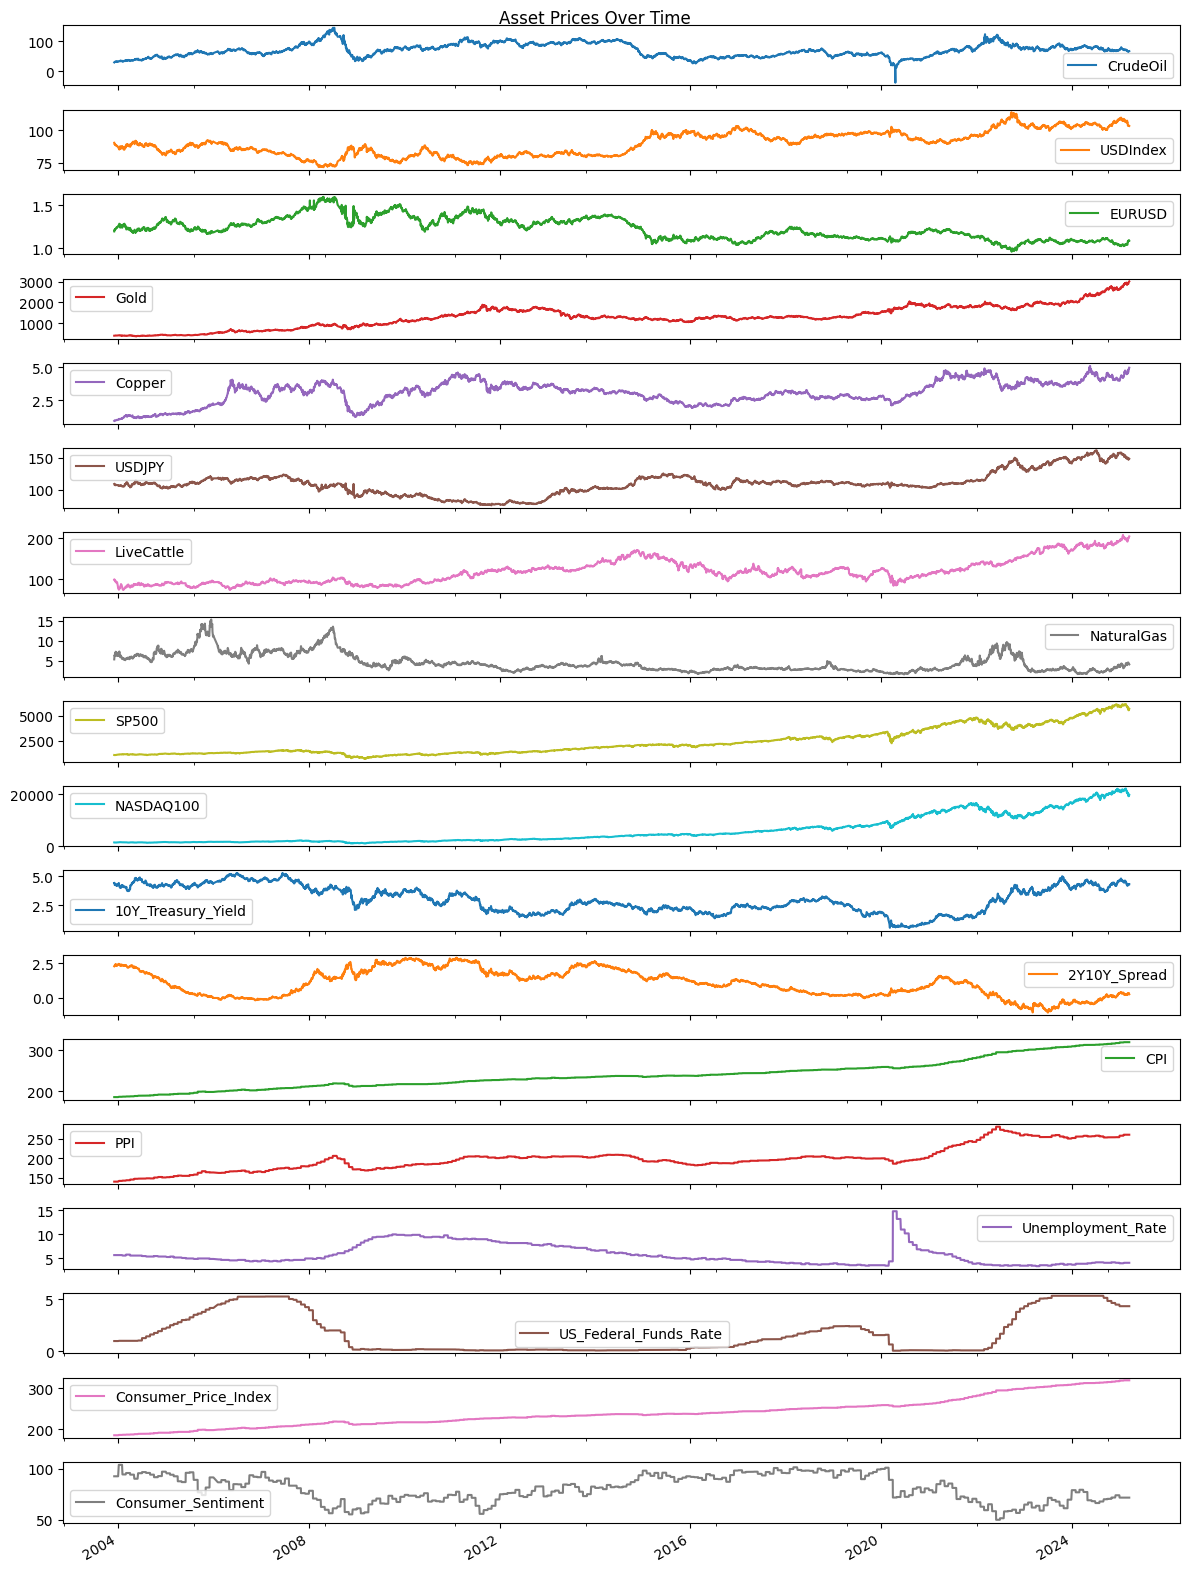

In [6]:
# Cell 4: Price Movement Visualization
import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(12, 16), title="Asset Prices Over Time")
plt.tight_layout()
plt.show()


In [7]:
# Cell 5: Calculate Daily Returns
returns = data.pct_change().dropna()
returns.head()


,CrudeOil,USDIndex,EURUSD,Gold,Copper,USDJPY,LiveCattle,NaturalGas,SP500,NASDAQ100,10Y_Treasury_Yield,2Y10Y_Spread,CPI,PPI,Unemployment_Rate,US_Federal_Funds_Rate,Consumer_Price_Index,Consumer_Sentiment
2003-12-02,0.027713,-0.007858,0.010360,0.002483,0.014652,-0.004030,0.005554,0.056029,-0.003271,-0.010497,-0.004545,0.013158,0.0,0.0,0.0,0.0,0.0,0.0
2003-12-03,0.010396,-0.001562,0.002813,0.000495,0.006704,-0.003955,-0.014311,0.031726,-0.001772,-0.008464,0.006849,0.004329,0.0,0.0,0.0,0.0,0.0,0.0
2003-12-04,0.005145,0.001117,-0.003467,-0.001486,-0.013320,-0.000277,-0.011207,0.100938,0.004687,0.008882,-0.006803,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2003-12-05,-0.016955,-0.005134,0.008775,0.007687,0.006231,-0.006003,-0.004894,-0.031876,-0.007684,-0.017782,-0.034247,0.012931,0.0,0.0,0.0,0.0,0.0,0.0
2003-12-08,0.044582,-0.004375,0.002713,0.000492,-0.002580,-0.001951,0.004660,0.125020,0.007348,0.007918,0.014184,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


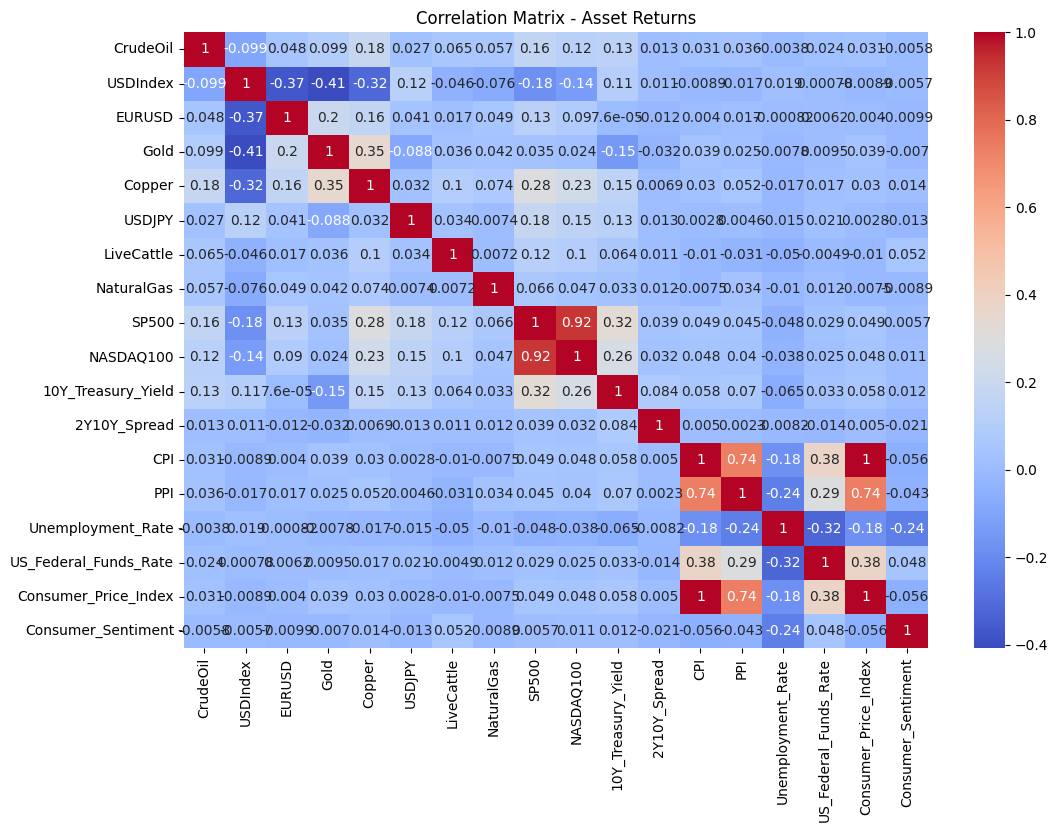

In [8]:
# Cell 5: Correlation Matrix & Heatmap
corr_matrix = returns.corr()

plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Asset Returns')
plt.show()


In [9]:
# Cell 6: Cointegration Tests (Refactored with simplified ticker names)
from statsmodels.tsa.stattools import coint

coint_results = {}
index_pairs = [('SP500', 'Gold'), ('NASDAQ100', 'Copper'), ('SP500', 'CrudeOil')]

# Adjusted to your exact new column names from the updated Cell 2
index_pairs = [('SP500', 'Gold'),
               ('NASDAQ100', 'Copper'),
               ('SP500', 'CrudeOil')]

for x, y in index_pairs:
    score, pvalue, _ = coint(data[x], data[y])
    coint_results[f"{x} vs {y}"] = {'cointegration_score': score, 'p-value': pvalue}

coint_results


{'SP500 vs Gold': {'cointegration_score': np.float64(-1.6789487544343695),
  'p-value': np.float64(0.6864490330859527)},
 'NASDAQ100 vs Copper': {'cointegration_score': np.float64(-1.1772122426436586),
  'p-value': np.float64(0.8637673113008904)},
 'SP500 vs CrudeOil': {'cointegration_score': np.float64(1.524210133576112),
  'p-value': 1.0}}

In [10]:
# Cell 6: Regression Analysis (Equities vs. Commodities) – Refactored with Simplified Names
import statsmodels.api as sm

# Updated clear column names from previous cells
X = returns[['Gold', 'Copper', 'CrudeOil', 'NaturalGas', 'LiveCattle']]
y = returns['SP500']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Display model summary clearly
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     122.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          2.27e-123
Time:                        02:07:54   Log-Likelihood:                 16209.
No. Observations:                5284   AIC:                        -3.241e+04
Df Residuals:                    5278   BIC:                        -3.237e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.002      0.0

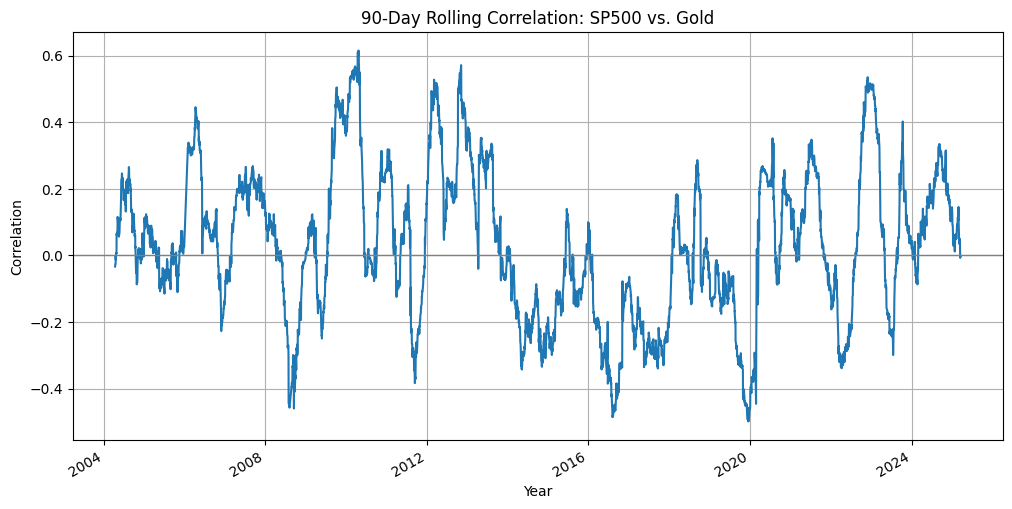

In [11]:
# Cell 7: Rolling Correlation between SP500 and Crude Oil (90-day rolling window)
import matplotlib.pyplot as plt

rolling_corr = returns['SP500'].rolling(window=90).corr(returns['Gold'])

rolling_corr.plot(figsize=(12, 6), title='90-Day Rolling Correlation: SP500 vs. Gold')
plt.axhline(0, color='grey', lw=1)
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


In [12]:
# Cell 7: Granger Causality Analysis (Do commodities lead equities or vice versa?)
from statsmodels.tsa.stattools import grangercausalitytests

test_result = grangercausalitytests(returns[['SP500', 'Gold']].dropna(), maxlag=10)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0011  , p=0.9731  , df_denom=5280, df_num=1
ssr based chi2 test:   chi2=0.0011  , p=0.9731  , df=1
likelihood ratio test: chi2=0.0011  , p=0.9731  , df=1
parameter F test:         F=0.0011  , p=0.9731  , df_denom=5280, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.4704  , p=0.0006  , df_denom=5277, df_num=2
ssr based chi2 test:   chi2=14.9549 , p=0.0006  , df=2
likelihood ratio test: chi2=14.9337 , p=0.0006  , df=2
parameter F test:         F=7.4704  , p=0.0006  , df_denom=5277, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.0107  , p=0.0018  , df_denom=5274, df_num=3
ssr based chi2 test:   chi2=15.0521 , p=0.0018  , df=3
likelihood ratio test: chi2=15.0307 , p=0.0018  , df=3
parameter F test:         F=5.0107  , p=0.0018  , df_denom=5274, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9805  , p=0.

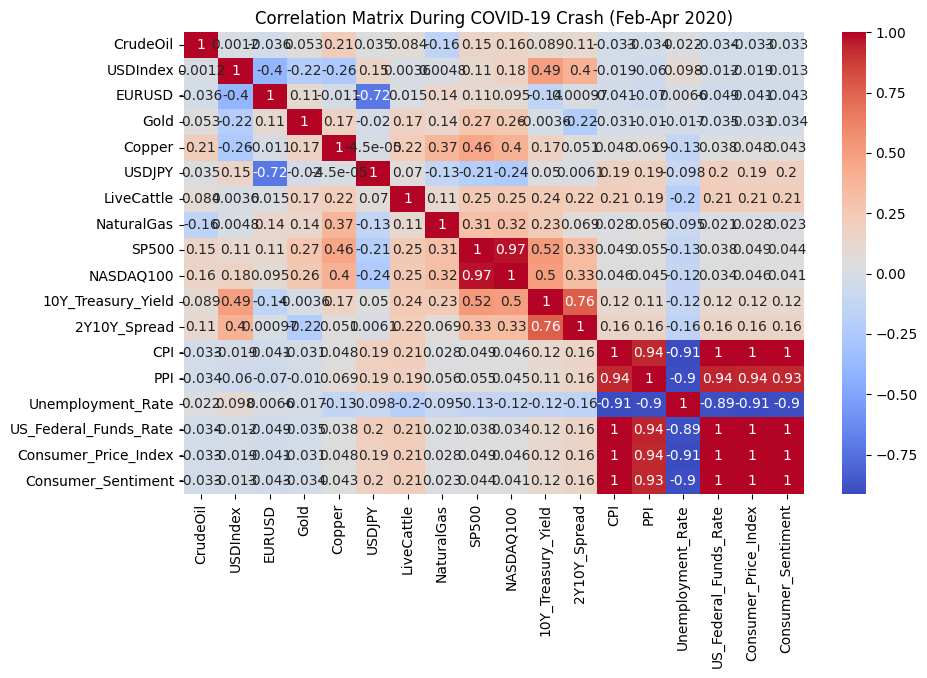

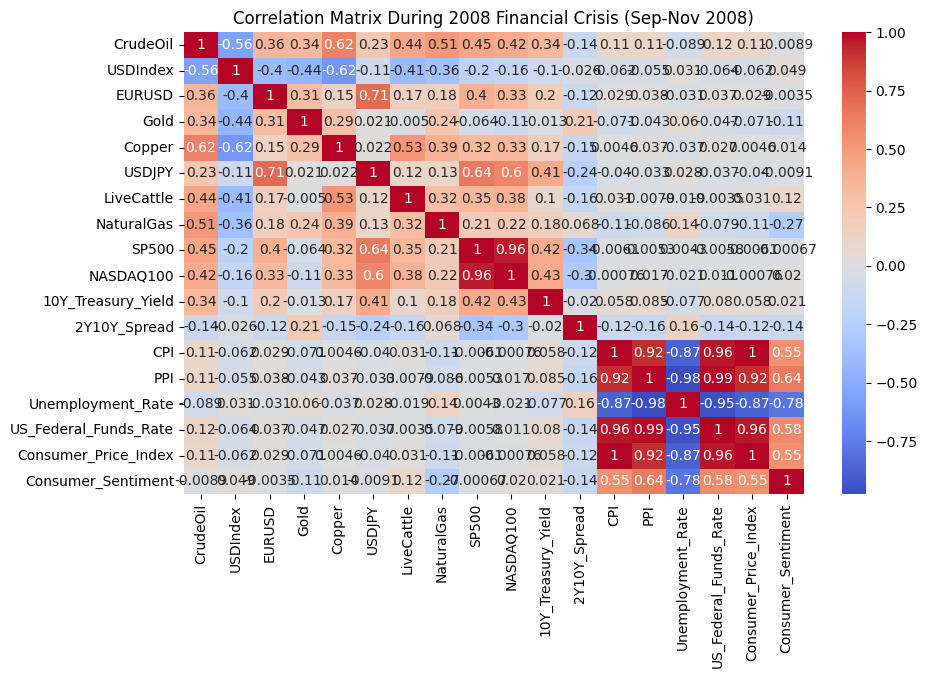

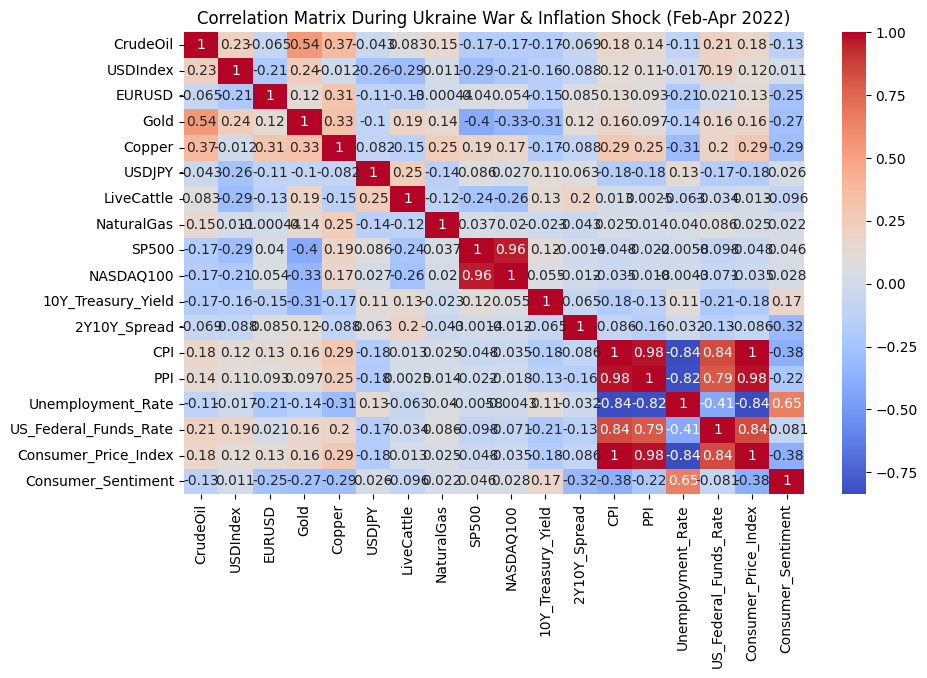

In [13]:
# Cell 8: Scenario Analysis – Major Market Stress Events
import seaborn as sns
import matplotlib.pyplot as plt

scenarios = {
    'COVID-19 Crash (Feb-Apr 2020)': returns.loc['2020-02':'2020-04'],
    '2008 Financial Crisis (Sep-Nov 2008)': returns.loc['2008-09':'2008-11'],
    'Ukraine War & Inflation Shock (Feb-Apr 2022)': returns.loc['2022-02':'2022-04']
}

for scenario_name, scenario_data in scenarios.items():
    scenario_corr = scenario_data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(scenario_corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix During {scenario_name}')
    plt.show()


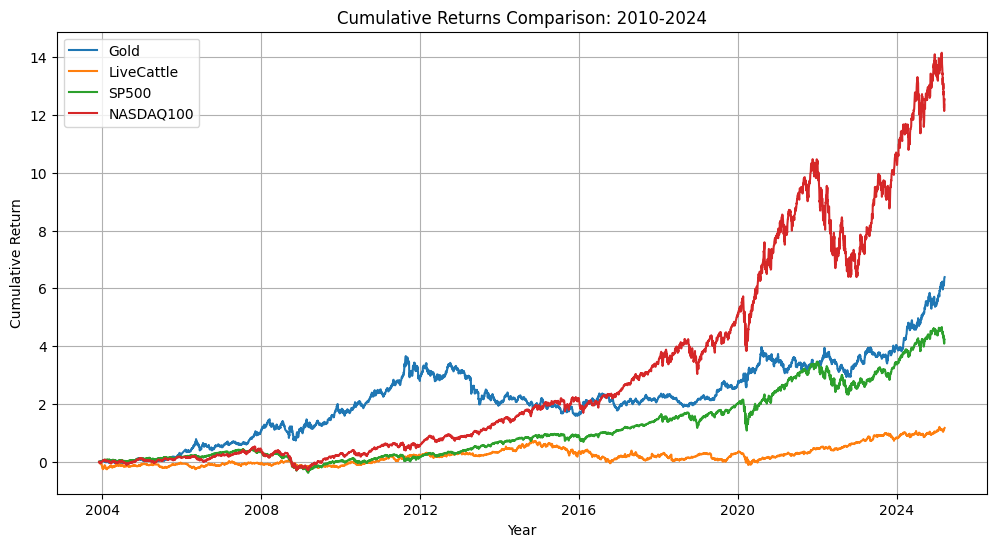

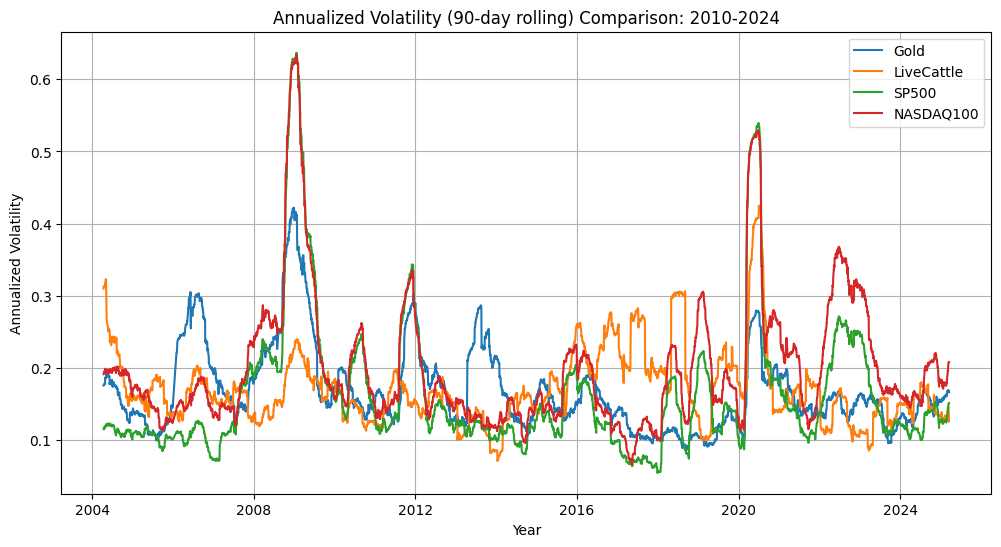

In [14]:
# Cell 9: Comparative Analysis of Returns and Volatility
import matplotlib.pyplot as plt

# Select relevant assets
assets = ['Gold', 'LiveCattle', 'SP500', 'NASDAQ100']

# Calculate cumulative returns clearly
cumulative_returns = (1 + returns[assets]).cumprod() - 1

# Calculate rolling volatility (90-day annualized volatility)
rolling_volatility = returns[assets].rolling(window=90).std() * np.sqrt(252)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(cumulative_returns.index, cumulative_returns[asset], label=asset)

plt.title('Cumulative Returns Comparison: 2010-2024')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot volatility clearly
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(rolling_vol := returns[asset].rolling(window=90).std() * np.sqrt(252), label=asset)

plt.title('Annualized Volatility (90-day rolling) Comparison: 2010-2024')
plt.xlabel('Year')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Multivariate Regression Analysis: Macroeconomic indicators vs. Equity Returns
import statsmodels.api as sm

# Define your predictors (macroeconomic indicators)
macro_vars = ['10Y_Treasury_Yield', '2Y10Y_Spread', 'Unemployment_Rate', 'CPI', 'Consumer_Sentiment']

# Target variable clearly defined (SP500 returns)
X_macro = data[macro_vars]
y_sp500 = data['SP500']

X_macro = sm.add_constant(X_macro)
macro_model = sm.OLS(y_sp500, X_macro).fit()

# Display clear, structured summary
print(macro_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.199e+04
Date:                Tue, 18 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:07:56   Log-Likelihood:                -38845.
No. Observations:                5288   AIC:                         7.770e+04
Df Residuals:                    5282   BIC:                         7.774e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7074.9908    117

In [16]:

# Granger Causality Tests: Macro variables and SP500 returns
from statsmodels.tsa.stattools import grangercausalitytests

# Define variables for causality analysis
macro_vars = ['10Y_Treasury_Yield', '2Y10Y_Spread', 'Unemployment_Rate', 'CPI', 'Consumer_Sentiment']
maxlag = 10

for var in macro_vars:
    print(f"\nGranger Causality Test: Does {var} predict SP500 returns?")
    grangercausalitytests(data[['SP500', var]].dropna(), maxlag=maxlag, verbose=True)



Granger Causality Test: Does 10Y_Treasury_Yield predict SP500 returns?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4261  , p=0.2324  , df_denom=5284, df_num=1
ssr based chi2 test:   chi2=1.4270  , p=0.2323  , df=1
likelihood ratio test: chi2=1.4268  , p=0.2323  , df=1
parameter F test:         F=1.4261  , p=0.2324  , df_denom=5284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8976  , p=0.1500  , df_denom=5281, df_num=2
ssr based chi2 test:   chi2=3.7988  , p=0.1497  , df=2
likelihood ratio test: chi2=3.7975  , p=0.1498  , df=2
parameter F test:         F=1.8976  , p=0.1500  , df_denom=5281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1522  , p=0.3265  , df_denom=5278, df_num=3
ssr based chi2 test:   chi2=3.4611  , p=0.3258  , df=3
likelihood ratio test: chi2=3.4600  , p=0.3260  , df=3
parameter F test:         F=1.1522  , p=0.3265  , df_denom=5278, df_num=3

Granger Causali

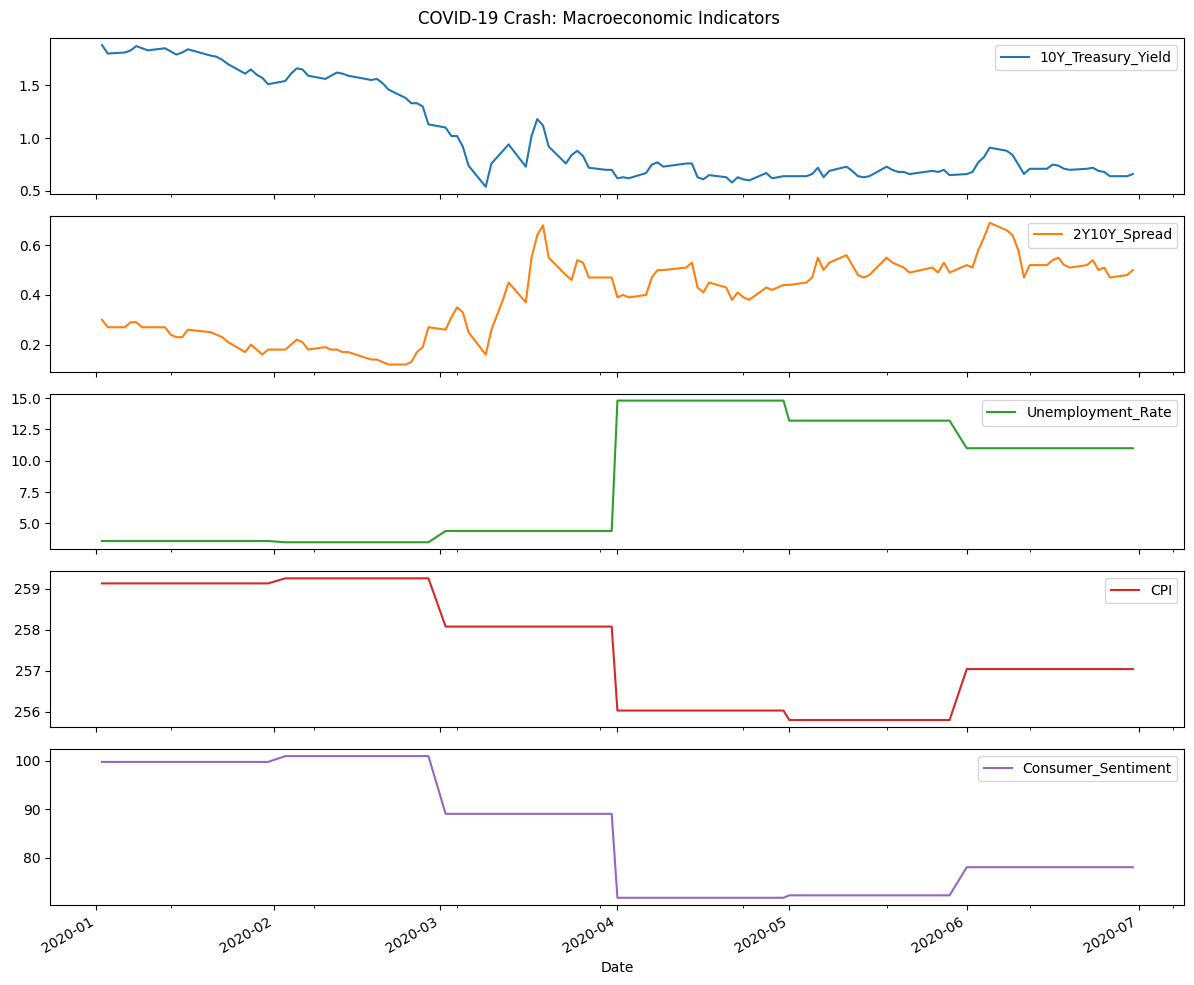

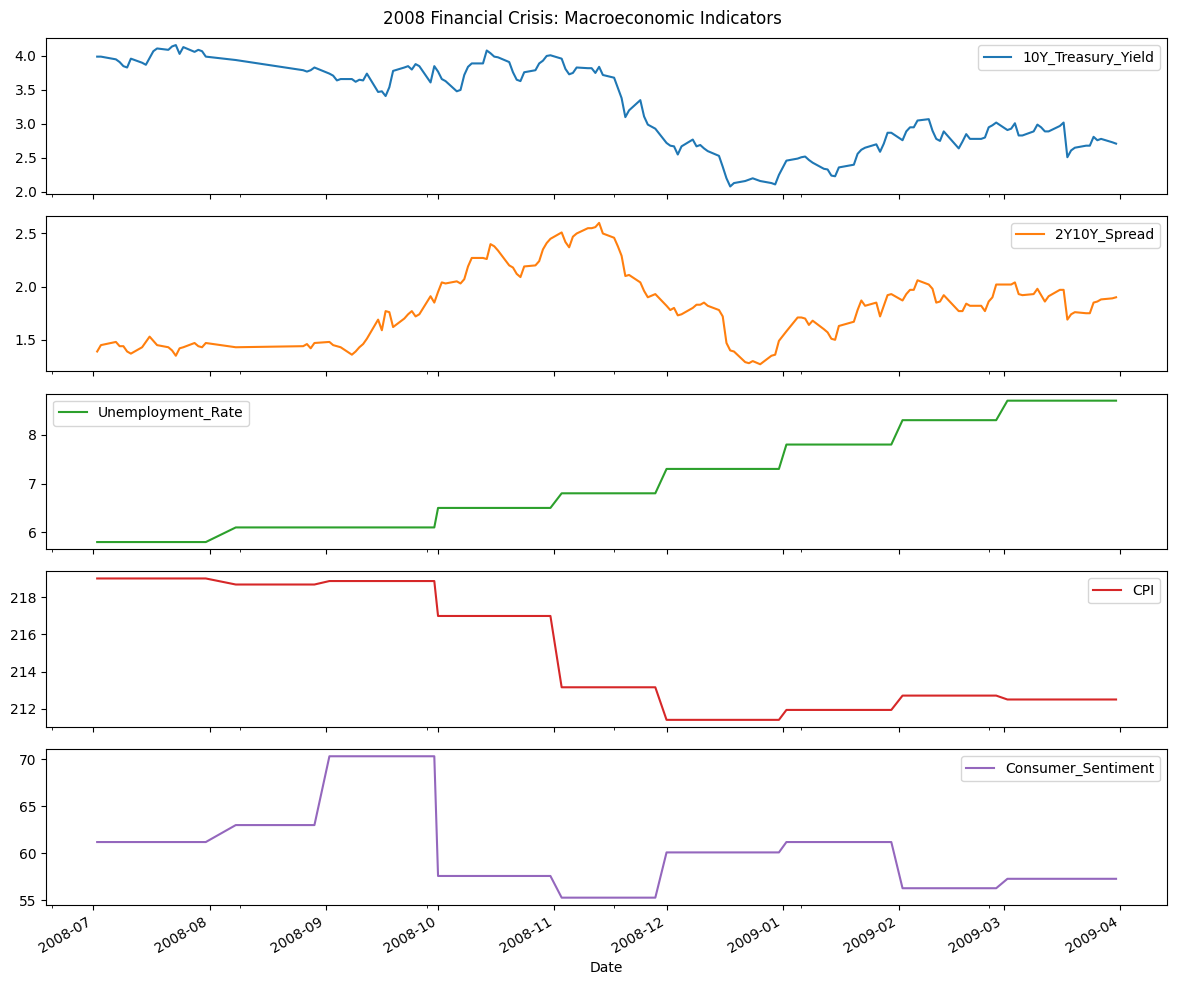

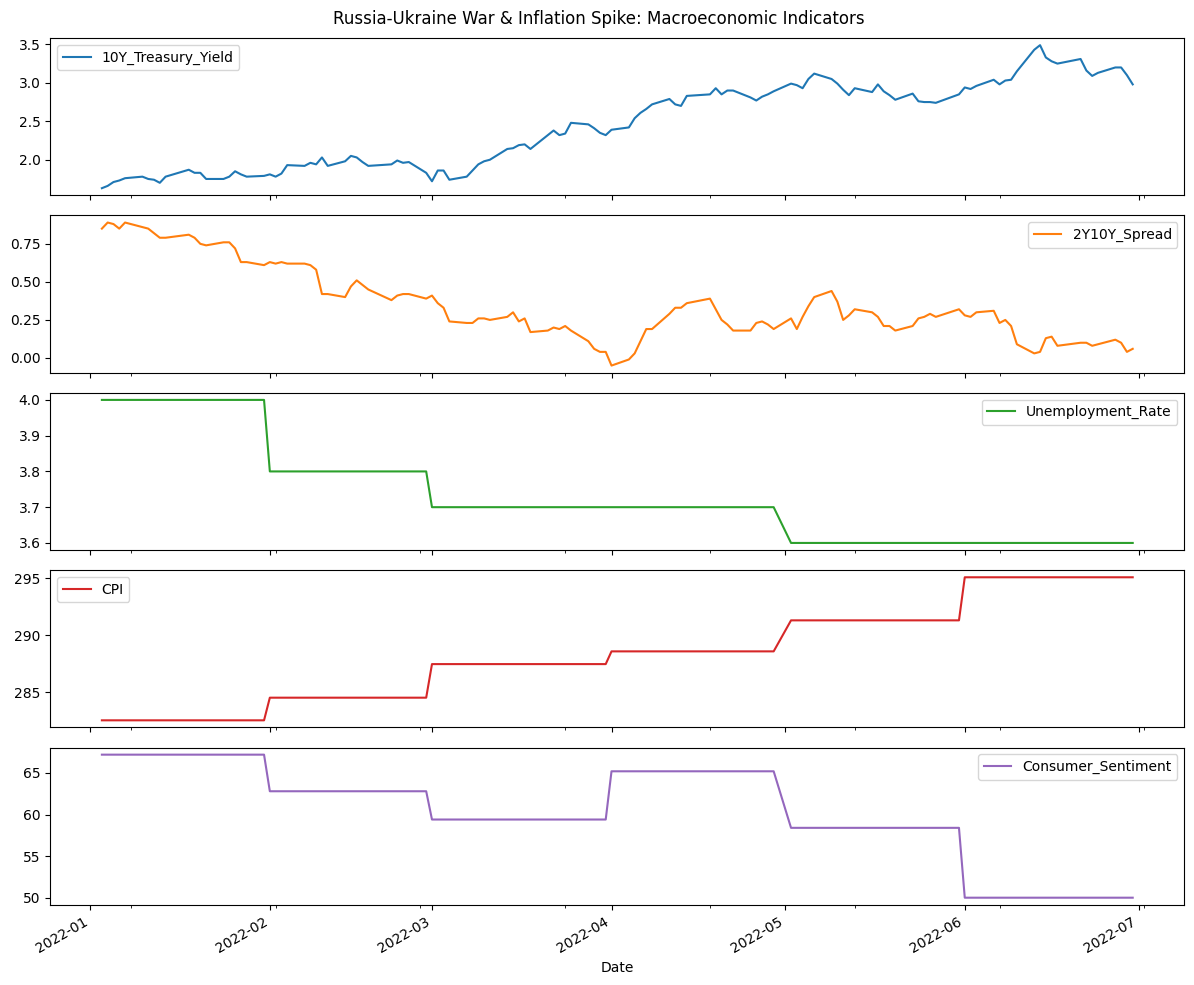

In [17]:
# Scenario Analysis: Macroeconomic Indicators During Market Stress Events
import matplotlib.pyplot as plt

# Define scenarios explicitly
scenarios = {
    'COVID-19 Crash': ('2020-01', '2020-06'),
    '2008 Financial Crisis': ('2008-07', '2009-03'),
    'Russia-Ukraine War & Inflation Spike': ('2022-01', '2022-06')
}

macro_vars = ['10Y_Treasury_Yield', '2Y10Y_Spread', 'Unemployment_Rate', 'CPI', 'Consumer_Sentiment']

for scenario, (start, end) in scenarios.items():
    scenario_data = data.loc[start:end, macro_vars]
    scenario_data.plot(subplots=True, figsize=(12, 10), title=f'{scenario}: Macroeconomic Indicators')
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()


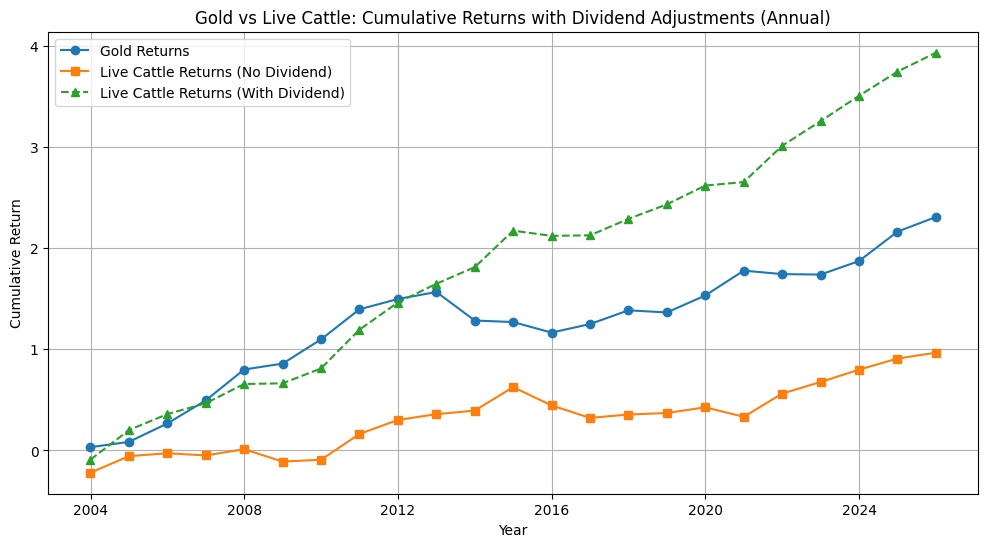

,Gold,LiveCattle,LiveCattle_DivAdj
2003-12-31,0.032282,-0.220399,-0.091399
2004-12-31,0.084724,-0.056539,0.201461
2005-12-31,0.266667,-0.027602,0.359398
2006-12-31,0.495056,-0.049505,0.466495
2007-12-31,0.800493,0.012178,0.657178
2008-12-31,0.858823,-0.110160,0.663840
2009-12-31,1.098298,-0.092107,0.810893
2010-12-31,1.395870,0.162544,1.194544
2011-12-31,1.497692,0.301562,1.462562
2012-12-31,1.567305,0.358518,1.648518


In [18]:
# Cell: Comparative Investment Analysis – Gold vs. Cattle with Annual Dividend Yield
import matplotlib.pyplot as plt
import numpy as np

# Annual dividend yield for cattle farming (clearly calculated previously)
cattle_annual_yield = 0.129  # 12.9% annual net yield from previous calculation

# Annualize daily returns explicitly
annual_returns = returns[['Gold', 'LiveCattle']].resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Clearly incorporate dividend yield explicitly into cattle returns
annual_returns_with_dividend = annual_returns.copy()
annual_returns_with_dividend['LiveCattle_DivAdj'] = annual_returns_with_dividend['LiveCattle'] +  cattle_annual_yield

# Compound returns to show cumulative performance clearly
cum_returns = (1 + annual_returns_with_dividend[['Gold', 'LiveCattle_DivAdj']]).cumprod() - 1

# Plot clearly and professionally
plt.figure(figsize=(12,6))
plt.plot(cum_returns.index, annual_returns_with_dividend['Gold'].cumsum(), marker='o', label='Gold Returns')
plt.plot(cum_returns_cattle := annual_returns_with_dividend['LiveCattle'].cumsum(), marker='s', label='Live Cattle Returns (No Dividend)')
plt.plot(cum_returns_cattle_div := annual_returns_with_dividend['LiveCattle_DivAdj'].cumsum(), marker='^', linestyle='--', label='Live Cattle Returns (With Dividend)')

plt.title('Gold vs Live Cattle: Cumulative Returns with Dividend Adjustments (Annual)')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()

# Display cumulative returns numerically
annual_returns_with_dividend.cumsum()


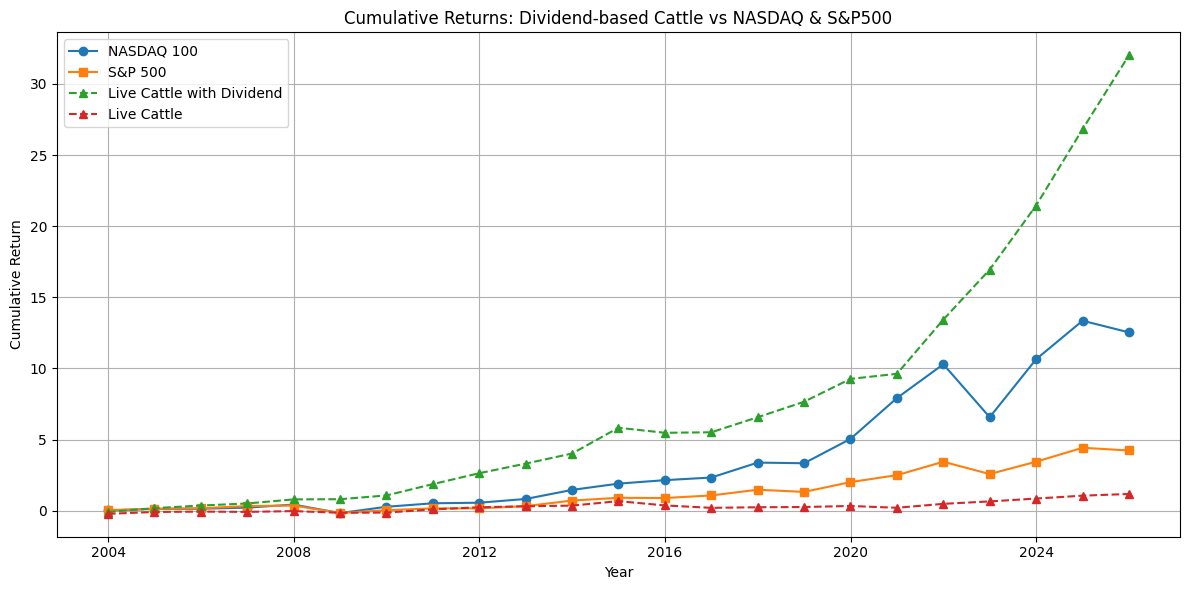

,NASDAQ100,SP500,LiveCattle,LiveCattle_DivAdj
2003-12-31,0.014401,0.039061,-0.220399,-0.091399
2004-12-31,0.122094,0.134032,-0.092653,0.174694
2005-12-31,0.136910,0.166495,-0.066397,0.360222
2006-12-31,0.214100,0.325365,-0.086847,0.505897
2007-12-31,0.427342,0.357679,-0.030521,0.793046
2008-12-31,-0.170505,-0.164834,-0.149124,0.804992
2009-12-31,0.273568,0.031047,-0.133764,1.070420
2010-12-31,0.518346,0.162843,0.086824,1.864740
2011-12-31,0.559402,0.162806,0.237912,2.632540
2012-12-31,0.821672,0.318688,0.308419,3.308036


In [19]:
# Cell: Dividend-Based Cattle Investment vs. SP500 & NASDAQ100
import matplotlib.pyplot as plt

# Previously calculated annual cattle dividend yield
cattle_yield = 0.129  # 12.9% annually

# Annualized returns for cattle and equity indices (NASDAQ100 and SP500)
annual_equity_returns = returns[['NASDAQ100', 'SP500', 'LiveCattle']].resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Explicitly add dividend yield to Live Cattle returns
annual_equity_returns['LiveCattle_DivAdj'] = annual_equity_returns['LiveCattle'] + cattle_yield

# Calculate cumulative returns explicitly
cumulative_returns = (1 + annual_equity_returns[['NASDAQ100', 'SP500','LiveCattle', 'LiveCattle_DivAdj']]).cumprod() - 1

# Clearly visualize cumulative returns over the period explicitly
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns.index, cumulative_returns['NASDAQ100'], marker='o', label='NASDAQ 100')
plt.plot(cumulative_returns.index, cumulative_returns['SP500'], marker='s', label='S&P 500')
plt.plot(cumulative_returns.index, cumulative_returns['LiveCattle_DivAdj'], marker='^', linestyle='--', label='Live Cattle with Dividend')
plt.plot(cumulative_returns.index, cumulative_returns['LiveCattle'], marker='^', linestyle='--', label='Live Cattle')

plt.title('Cumulative Returns: Dividend-based Cattle vs NASDAQ & S&P500')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Clearly display cumulative returns numerically
cumulative_returns


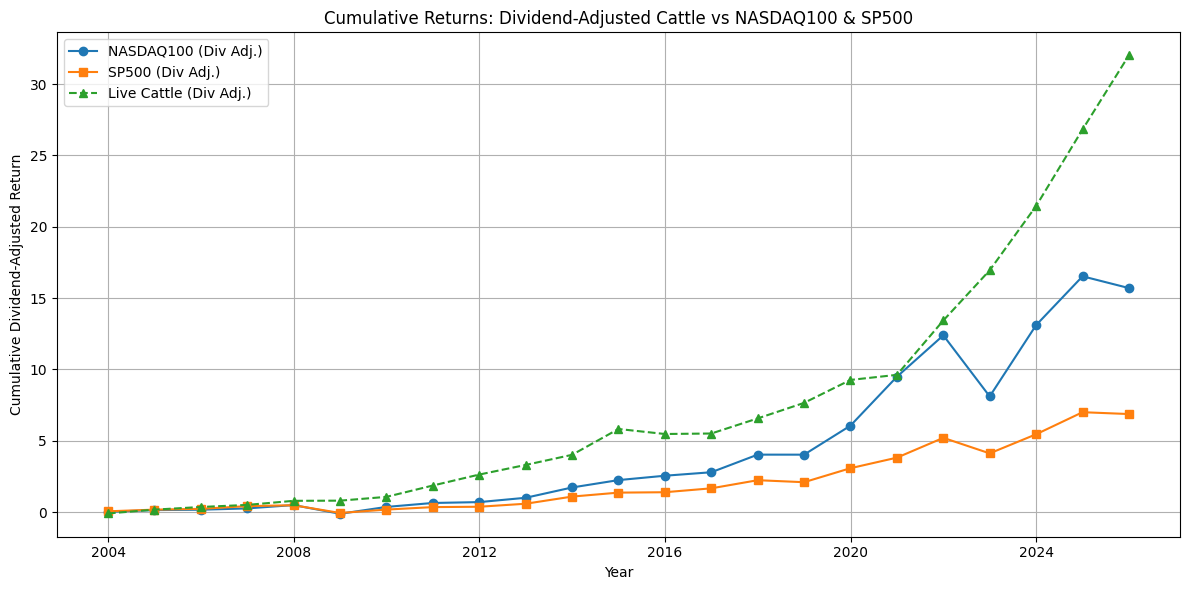

,NASDAQ100_DivAdj,SP500_DivAdj,LiveCattle_DivAdj
2003-12-31,0.024401,0.058061,-0.091399
2004-12-31,0.143400,0.174872,0.174694
2005-12-31,0.169931,0.230827,0.360222
2006-12-31,0.261062,0.421844,0.505897
2007-12-31,0.495164,0.483525,0.793046
2008-12-31,-0.116139,-0.059234,0.804992
2009-12-31,0.365877,0.179289,1.070420
2010-12-31,0.642056,0.352441,1.864740
2011-12-31,0.702877,0.378094,2.632540
2012-12-31,1.006306,0.589021,3.308036


In [20]:
# Enhanced Cell: Dividend-Adjusted Returns Comparison (NASDAQ, S&P500, Cattle)
import matplotlib.pyplot as plt

# Annual dividend yields
cattle_yield = 0.129          # Cattle dividend yield (~12.9%)
sp500_div_yield = 0.019       # S&P 500 dividend yield (~1.9%)
nasdaq_div_yield = 0.01       # NASDAQ100 dividend yield (~1.0%)

# Compute annual returns explicitly
annual_equity_returns = returns[['NASDAQ100', 'SP500', 'LiveCattle']].resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Explicitly add dividends to annual returns
annual_equity_returns['NASDAQ100_DivAdj'] = annual_equity_returns['NASDAQ100'] + nasdaq_div_yield
annual_equity_returns['SP500_DivAdj'] = annual_equity_returns['SP500'] + sp500_div_yield
annual_equity_returns['LiveCattle_DivAdj'] = annual_equity_returns['LiveCattle'] + cattle_yield

# Calculate cumulative returns explicitly
cumulative_div_adj_returns = (1 + annual_equity_returns[['NASDAQ100_DivAdj', 'SP500_DivAdj', 'LiveCattle_DivAdj']]).cumprod() - 1

# Visualize dividend-adjusted cumulative returns explicitly
plt.figure(figsize=(12, 6))
plt.plot(cumulative_div_adj_returns.index, cumulative_div_adj_returns['NASDAQ100_DivAdj'], marker='o', label='NASDAQ100 (Div Adj.)')
plt.plot(cumulative_div_adj_returns.index, cumulative_div_adj_returns['SP500_DivAdj'], marker='s', label='SP500 (Div Adj.)')
plt.plot(cumulative_div_adj_returns.index, cumulative_div_adj_returns['LiveCattle_DivAdj'], marker='^', linestyle='--', label='Live Cattle (Div Adj.)')

plt.title('Cumulative Returns: Dividend-Adjusted Cattle vs NASDAQ100 & SP500')
plt.xlabel('Year')
plt.ylabel('Cumulative Dividend-Adjusted Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display dividend-adjusted cumulative returns numerically clearly
cumulative_div_adj_returns


In [21]:
# Cell: Fetch VIX data explicitly from yfinance and rename (corrected explicitly)
import yfinance as yf
import pandas as pd

vix = yf.download('^VIX', start='2002-01-01', end='2024-03-01')['Close']

# Align explicitly with your existing dataframe (data)
data = data.merge(vix, left_index=True, right_index=True, how='inner').dropna()

# Explicitly rename ^VIX column clearly
data = data.rename(columns={
    '^VIX': 'VIX'
})

data.head()


[*********************100%***********************]  1 of 1 completed


,CrudeOil,USDIndex,EURUSD,Gold,Copper,USDJPY,LiveCattle,NaturalGas,SP500,NASDAQ100,10Y_Treasury_Yield,2Y10Y_Spread,CPI,PPI,Unemployment_Rate,US_Federal_Funds_Rate,Consumer_Price_Index,Consumer_Sentiment,VIX
2003-12-01,29.950001,90.349998,1.196501,402.700012,0.9555,109.169998,99.025002,5.283,1070.119995,1447.079956,4.40,2.28,185.5,139.5,5.7,0.98,185.5,92.6,16.770000
2003-12-02,30.780001,89.639999,1.208897,403.700012,0.9695,108.730003,99.574997,5.579,1066.619995,1431.890015,4.38,2.31,185.5,139.5,5.7,0.98,185.5,92.6,16.270000
2003-12-03,31.100000,89.500000,1.212298,403.899994,0.9760,108.300003,98.150002,5.756,1064.729980,1419.770020,4.41,2.32,185.5,139.5,5.7,0.98,185.5,92.6,16.629999
2003-12-04,31.260000,89.599998,1.208094,403.299988,0.9630,108.269997,97.050003,6.337,1069.719971,1432.380005,4.38,2.32,185.5,139.5,5.7,0.98,185.5,92.6,16.299999
2003-12-05,30.730000,89.139999,1.218695,406.399994,0.9690,107.620003,96.574997,6.135,1061.500000,1406.910034,4.23,2.35,185.5,139.5,5.7,0.98,185.5,92.6,17.090000


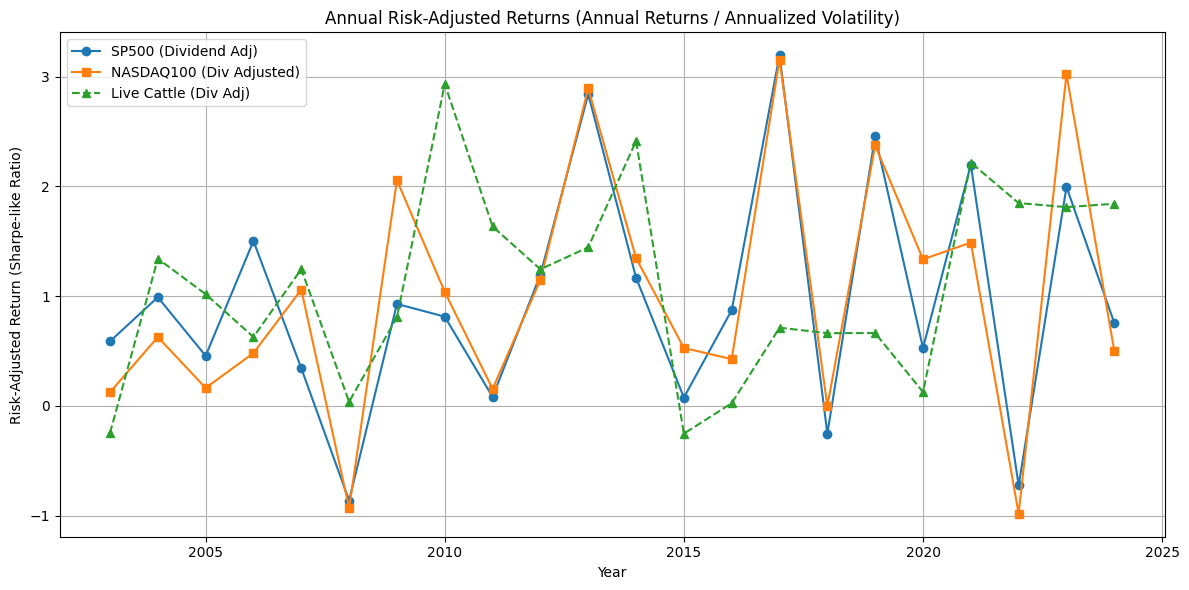

,SP500_RiskAdj,NASDAQ100_RiskAdj,LiveCattle_DivAdj_RiskAdj
2003-12-31,0.588272,0.124412,-0.247184
2004-12-31,0.990333,0.627150,1.341679
2005-12-31,0.456287,0.163157,1.018434
2006-12-31,1.503236,0.481565,0.628091
2007-12-31,0.342649,1.060265,1.246076
2008-12-31,-0.862794,-0.932930,0.037262
2009-12-31,0.929235,2.056323,0.807781
2010-12-31,0.813368,1.038161,2.934506
2011-12-31,0.081295,0.154779,1.635391
2012-12-31,1.196629,1.148475,1.245032


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Explicitly calculate daily percentage returns:
daily_returns = data[['SP500', 'NASDAQ100', 'LiveCattle']].pct_change().dropna()

# Step 2: Explicitly calculate annual returns:
annual_returns = daily_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)

# Explicitly add annual dividends:
annual_returns['SP500_DivAdj'] = annual_returns['SP500'] + 0.019
annual_returns['NASDAQ100_DivAdj'] = annual_returns['NASDAQ100'] + 0.010
annual_returns['LiveCattle_DivAdj'] = annual_returns['LiveCattle'] + 0.129

# Step 2: Explicitly calculate annualized volatility (standard deviation of daily returns):
annual_volatility = daily_returns.resample('Y').std() * np.sqrt(252)

# Step 3: Explicit Risk-Adjusted Returns (Sharpe-like ratio):
risk_adj_returns = pd.DataFrame({
    'SP500_RiskAdj': annual_returns['SP500_DivAdj'] / annual_volatility['SP500'],
    'NASDAQ100_RiskAdj': annual_returns['NASDAQ100_DivAdj'] / annual_volatility['NASDAQ100'],
    'LiveCattle_DivAdj_RiskAdj': annual_returns['LiveCattle_DivAdj'] / annual_volatility['LiveCattle']
})

# Plot explicitly the Risk-Adjusted Returns:
plt.figure(figsize=(12, 6))
plt.plot(risk_adj_returns.index.year, risk_adj_returns['SP500_RiskAdj'], marker='o', label='SP500 (Dividend Adj)')
plt.plot(risk_adj_returns.index.year, risk_adj_returns['NASDAQ100_RiskAdj'], marker='s', label='NASDAQ100 (Div Adjusted)')
plt.plot(risk_adj_returns.index.year, risk_adj_returns['LiveCattle_DivAdj_RiskAdj'], marker='^', linestyle='--', label='Live Cattle (Div Adj)')

plt.title('Annual Risk-Adjusted Returns (Annual Returns / Annualized Volatility)')
plt.xlabel('Year')
plt.ylabel('Risk-Adjusted Return (Sharpe-like Ratio)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show results explicitly
risk_adj_returns


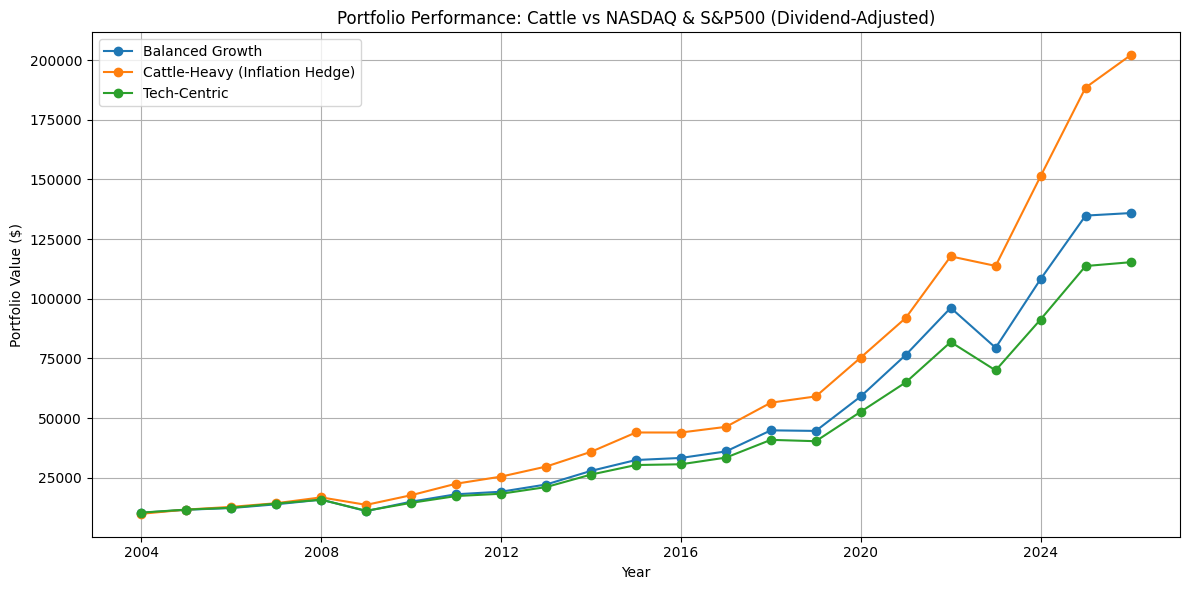

,Balanced Growth,Cattle-Heavy (Inflation Hedge),Tech-Centric
2003-12-31,10270.733411,9856.012968,10338.052630
2004-12-31,11556.176087,11623.368048,11620.004367
2005-12-31,12276.359792,12760.780116,12400.924618
2006-12-31,13832.806881,14293.154218,14164.882319
2007-12-31,15786.271672,16739.922298,15762.231966
2008-12-31,10996.949596,13604.038722,11115.743969
2009-12-31,14936.173194,17645.563764,14448.782293
2010-12-31,18038.905780,22467.086598,17290.256133
2011-12-31,19110.184265,25439.365398,18254.582649
2012-12-31,22130.630482,29647.323895,21048.052004


In [25]:
# New Cell: Portfolio Simulation Based on Various Allocations
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Initial investment amount
initial_investment = 10000

# Portfolio allocation scenarios
portfolios = {
    "Balanced Growth": {"SP500": 0.40, "NASDAQ100": 0.40, "LiveCattle": 0.10, "Gold": 0.10},
    "Cattle-Heavy (Inflation Hedge)": {"SP500": 0.30, "NASDAQ100": 0.20, "LiveCattle": 0.40, "Gold": 0.10},
    "Tech-Centric": {"SP500": 0.20, "NASDAQ100": 0.60, "LiveCattle": 0.10, "Gold": 0.10}
}

# Extract relevant dividend-adjusted returns
annual_returns = annual_equity_returns[['NASDAQ100_DivAdj', 'SP500_DivAdj', 'LiveCattle_DivAdj']]
annual_returns['Gold'] = returns['Gold'].resample('Y').apply(lambda x: (1 + x).prod() - 1)  # Gold has no dividend adjustment

# Initialize DataFrame to store portfolio values
portfolio_values = pd.DataFrame(index=annual_returns.index)

# Simulate portfolio growth for each allocation
for name, allocation in portfolios.items():
    portfolio_growth = (1 + (annual_returns * list(allocation.values())).sum(axis=1)).cumprod() * initial_investment
    portfolio_values[name] = portfolio_growth

# Plot portfolio performance over time
plt.figure(figsize=(12,6))
for name in portfolios.keys():
    plt.plot(portfolio_values.index, portfolio_values[name], marker='o', label=name)

plt.title('Portfolio Performance: Cattle vs NASDAQ & S&P500 (Dividend-Adjusted)')
plt.xlabel('Year')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display final portfolio values
display(portfolio_values)

